# 1. Installing Package

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# 2. Cleaning Data

In [ ]:
# Import dataset
df = pd.read_csv("/content/drive/MyDrive/Lomba Artikel Populer Statistik/Analisis Sentimen Pemerintahan Kota Magelang/review_instansi_pemerintahan_kota_magelang.csv")
df

,address,categories/0,categories/1,categoryName,cid,city,countryCode,error,errorDescription,fid,...,state,street,temporarilyClosed,text,textTranslated,title,totalScore,translatedLanguage,url,visitedIn
0,"Rejowinangun Sel., Kec. Magelang Sel., Kota Ma...",Kantor Pos,NaN,Kantor Pos,11215768323538199064,Kota Magelang,ID,no_reviews,"Place ""Kantor Pos Gembira 48"" (ID: ChIJpf___0a...",0x2e7a8f46ffffffa5:0x9ba669ddd792a218,...,Jawa Tengah,NaN,False,NaN,NaN,Kantor Pos Gembira 48,NaN,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN
1,"Jl. Mayjen. D. I. Panjaitan No. 15, Kemirirejo...",Kantor Polisi,NaN,Kantor Polisi,9804901472607236337,Kota Magelang,ID,no_reviews,"Place ""Polsek Magelang Tengah"" (ID: ChIJVVVVlV...",0x2e7a8f5c95555555:0x881201f0d47570f1,...,Jawa Tengah,"Jl. Mayjen. D. I. Panjaitan No. 15, Kemirirejo...",False,NaN,NaN,Polsek Magelang Tengah,NaN,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN
2,"Jl. Veteran No.3, Magelang, Kec. Magelang Teng...",Kantor Pemerintah,NaN,Kantor Pemerintah,16334191536141566667,Kota Magelang,ID,no_reviews,"Place ""Aula Handal KPPN Magelang"" (ID: ChIJNfw...",0x2e7a852f672efc35:0xe2aeb4a8ece902cb,...,Jawa Tengah,Jl. Veteran No.3,False,NaN,NaN,Aula Handal KPPN Magelang,NaN,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN
3,"G64G+VCC, Tidar Sel., Kec. Magelang Sel., Kota...",Balai Kota,NaN,Balai Kota,358626237230082376,Kota Magelang,ID,no_reviews,"Did not find any reviews for place ""Balai Supi...",0x2e7a8f072b2a4bd9:0x4fa18a9a53be948,...,Jawa Tengah,G64G+VCC,False,NaN,NaN,Balai Supinti,5.0,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN
4,"Jl. Soekarno Hatta No.15, Rejowinangun Utara, ...",Kantor Pemerintah,NaN,Kantor Pemerintah,11638684082622413158,Kota Magelang,ID,no_reviews,"Place ""Samsat STNK Drive Thru Kota Magelang"" (...",0x2e7a8f007b96c833:0xa184e9823db3b966,...,Jawa Tengah,Jl. Soekarno Hatta No.15,False,NaN,NaN,Samsat STNK Drive Thru Kota Magelang,NaN,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,"G6W8+Q37, Kramat Sel., Kec. Magelang Utara, Ko...",Kompleks Olahraga,Stadion,Kompleks Olahraga,2234983215176246393,Kota Magelang,ID,NaN,NaN,0x2e7a85c1c9a22d7d:0x1f0441648b8a6479,...,Jawa Tengah,G6W8+Q37,False,Istimewa tempatnya luas,NaN,GOR Samapta,4.5,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN
3285,"G6W8+Q37, Kramat Sel., Kec. Magelang Utara, Ko...",Kompleks Olahraga,Stadion,Kompleks Olahraga,2234983215176246393,Kota Magelang,ID,NaN,NaN,0x2e7a85c1c9a22d7d:0x1f0441648b8a6479,...,Jawa Tengah,G6W8+Q37,False,NaN,NaN,GOR Samapta,4.5,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN
3286,"G6W8+Q37, Kramat Sel., Kec. Magelang Utara, Ko...",Kompleks Olahraga,Stadion,Kompleks Olahraga,2234983215176246393,Kota Magelang,ID,NaN,NaN,0x2e7a85c1c9a22d7d:0x1f0441648b8a6479,...,Jawa Tengah,G6W8+Q37,False,NaN,NaN,GOR Samapta,4.5,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN
3287,"G6W8+Q37, Kramat Sel., Kec. Magelang Utara, Ko...",Kompleks Olahraga,Stadion,Kompleks Olahraga,2234983215176246393,Kota Magelang,ID,NaN,NaN,0x2e7a85c1c9a22d7d:0x1f0441648b8a6479,...,Jawa Tengah,G6W8+Q37,False,Luas tempatnya,NaN,GOR Samapta,4.5,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 98 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address                  3289 non-null   object 
 1   categories/0             3289 non-null   object 
 2   categories/1             1215 non-null   object 
 3   categoryName             3289 non-null   object 
 4   cid                      3289 non-null   uint64 
 5   city                     3289 non-null   object 
 6   countryCode              3289 non-null   object 
 7   error                    26 non-null     object 
 8   errorDescription         26 non-null     object 
 9   fid                      3289 non-null   object 
 10  imageUrl                 3286 non-null   object 
 11  isAdvertisement          3289 non-null   bool   
 12  isLocalGuide             3263 non-null   object 
 13  language                 3289 non-null   object 
 14  likesCount              

In [ ]:
df = df[['stars', 'text']]

In [ ]:
df = df.rename(columns={'stars': 'rating', 'text': 'review'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  3263 non-null   float64
 1   review  1947 non-null   object 
dtypes: float64(1), object(1)
memory usage: 51.5+ KB


In [ ]:
# Calculate the frequency of each rating
rating_counts = df['rating'].value_counts().sort_index()

# Display the rating counts
print("Frequency of each rating:")
print(rating_counts)


Frequency of each rating:
rating
1.0     501
2.0      77
3.0     115
4.0     355
5.0    2215
Name: count, dtype: int64


/tmp/ipython-input-1585544964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Set2')


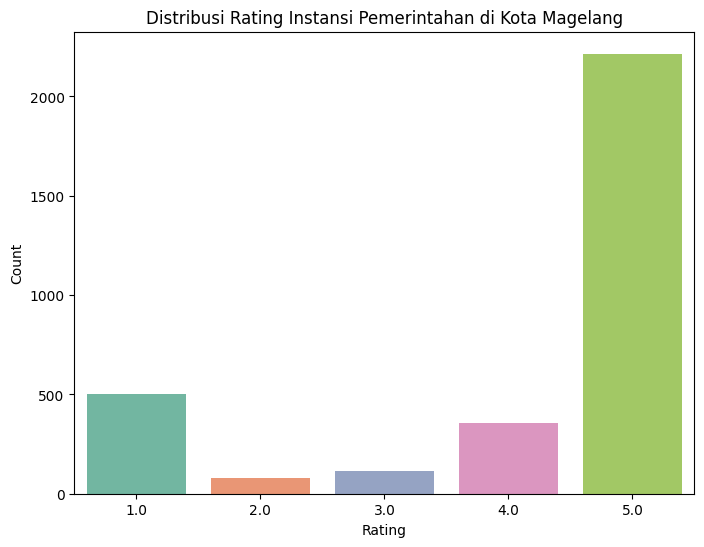

In [ ]:
plt.figure(figsize=(8,6))
# Use sns.barplot to plot the rating_counts Series
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Set2')
plt.title('Distribusi Rating Instansi Pemerintahan di Kota Magelang')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# drop empty rows
df = df.dropna()

In [ ]:
# change all character in column review as lowercase
df['review'] = df['review'].astype(str).str.lower()

In [ ]:
# drop duplicate values
df = df.drop_duplicates(subset=['review'])

In [ ]:
# drop empty rows
df = df.dropna()

In [ ]:
# clean unique character
def clean_gmaps_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['review'] = df['review'].apply(clean_gmaps_text)

In [ ]:
df = df.dropna()

In [ ]:
df

,rating,review
9,5.0,pelayanan di puskesmas magelang tengah sangat ...
10,5.0,pukesmas magelang tengah kelurahan magelang sa...
11,1.0,ini lama banget saat nunggu obat pdahal gak ta...
13,1.0,pegawai tdk ramah
14,5.0,baik semua sopan pokoknya baiiikkk
...,...,...
3274,3.0,gowess pagi
3279,4.0,
3280,4.0,integreted sport center at magelang
3281,4.0,gasss


# 3. Preprocessing

Normalization

In [ ]:
norm = {
    'nggak': 'tidak',
    'bgt': 'sangat',
    'banget': 'sangat',
    'tdk': 'tidak',
    'yg': 'yang',
    'dgn': 'dengan',
    'utk': 'untuk',
    'jg': 'juga',
    'jga': 'juga',
    'aja': 'saja',
    'blm': 'belum',
    'sdh': 'sudah',
    'krn': 'karena',
    'bkn': 'bukan',
    'dr': 'dari',
    'trs': 'terus',
    'emg': 'memang',
    'klo': 'kalau',
    'mantul': 'mantap',
    'recomended': 'direkomendasikan',
    'gaes': 'teman-teman',
    'gokil': 'luar biasa',
    'tp': 'tapi',
    'tmpt': 'tempat',
    'bikin': 'membuat',
    'kyk': 'seperti',
    'udh': 'sudah',
    'pas': 'saat',
    'bgtu': 'begitu',
    'bbrp': 'beberapa',
    'sampe': 'sampai',
    'skrg': 'sekarang',
    'bgtu': 'begitu',
    'dll': 'dan lain lain',
    'dsb': 'dan sebagainya'
}

def normalisasi (str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

# Apply the normalization function directly to the Series
df['review'] = df['review'].apply(lambda x: normalisasi(x))

In [ ]:
df

,rating,review
9,5.0,pelayanan di puskesmas magelang tengah sangat ...
10,5.0,pukesmas magelang tengah kelurahan magelang sa...
11,1.0,ini lama sangat saat nunggu obat pdahal gak ta...
13,1.0,pegawai tidak ramah
14,5.0,baik semua sopan pokoknya baiiikkk
...,...,...
3274,3.0,gowess pagi
3279,4.0,
3280,4.0,integreted sport center at magelang
3281,4.0,gasss


Stopwords

In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['review'] = df['review'].apply(lambda x: stopword(x))

In [ ]:
df

,rating,review
9,5.0,pelayanan puskesmas magelang tengah sangat mem...
10,5.0,pukesmas magelang tengah kelurahan magelang sa...
11,1.0,lama sangat nunggu obat pdahal gak tau karyawa...
13,1.0,pegawai ramah
14,5.0,baik semua sopan pokoknya baiiikkk
...,...,...
3274,3.0,gowess pagi
3279,4.0,
3280,4.0,integreted sport center at magelang
3281,4.0,gasss


Tokenize

In [ ]:
tokenized = df['review'].apply(lambda x:x.split())
tokenized.head()

,review
9,"[pelayanan, puskesmas, magelang, tengah, sanga..."
10,"[pukesmas, magelang, tengah, kelurahan, magela..."
11,"[lama, sangat, nunggu, obat, pdahal, gak, tau,..."
13,"[pegawai, ramah]"
14,"[baik, semua, sopan, pokoknya, baiiikkk]"


Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean

tokenized = tokenized.apply(stemming)
tokenized.to_csv("/content/drive/MyDrive/Lomba Artikel Populer Statistik/Analisis Sentimen Pemerintahan Kota Magelang/hasilPreprocessing.csv", index=False)

# 4. Labelling

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Lomba Artikel Populer Statistik/Analisis Sentimen Pemerintahan Kota Magelang/hasilPreprocessing.csv")
df

,review
0,layan puskesmas magelang tengah sangat muas se...
1,pukesmas magelang tengah lurah magelang sangat...
2,lama sangat nunggu obat pdahal gak tau karyawa...
3,pegawai ramah
4,baik semua sopan pokok baiiikkk
...,...
1830,gowess pagi
1831,NaN
1832,integreted sport center at magelang
1833,gasss


In [ ]:
df = df.dropna()

In [ ]:
df

,review
0,layan puskesmas magelang tengah sangat muas se...
1,pukesmas magelang tengah lurah magelang sangat...
2,lama sangat nunggu obat pdahal gak tau karyawa...
3,pegawai ramah
4,baik semua sopan pokok baiiikkk
...,...
1829,gr nyiji
1830,gowess pagi
1832,integreted sport center at magelang
1833,gasss


In [ ]:
classifier = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

def prediksi_sentimen(teks):
  hasil = classifier(teks)
  return hasil[0]['label']

df['sentimen'] = df['review'].apply(prediksi_sentimen)
df.head()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
/tmp/ipython-input-3487850218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentimen'] = df['review'].apply(prediksi_sentimen)


,review,sentimen
0,layan puskesmas magelang tengah sangat muas se...,positive
1,pukesmas magelang tengah lurah magelang sangat...,positive
2,lama sangat nunggu obat pdahal gak tau karyawa...,negative
3,pegawai ramah,positive
4,baik semua sopan pokok baiiikkk,positive


In [ ]:
sentiment_counts = df.sentimen.value_counts()
sentiment_counts

,count
sentimen,
positive,1054
negative,471
neutral,294


/tmp/ipython-input-2272258118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimen', data=df, palette='Set2')


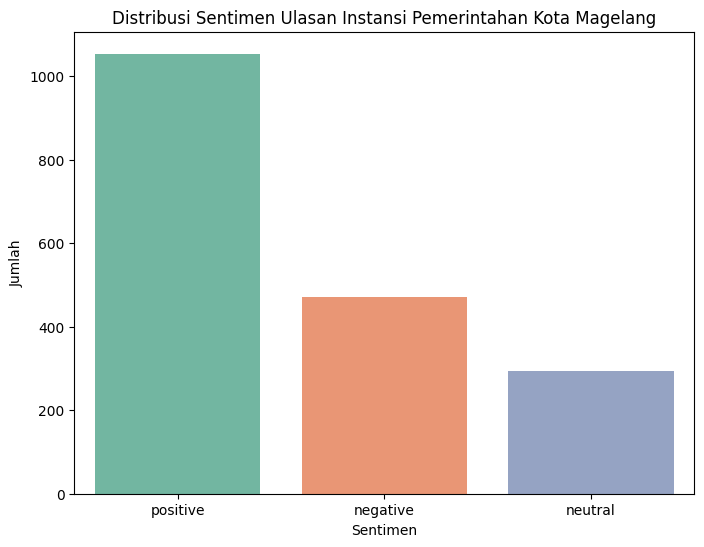

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentimen', data=df, palette='Set2')
plt.title('Distribusi Sentimen Ulasan Instansi Pemerintahan Kota Magelang')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

# 5. Training Data (Naive Bayes)



In [ ]:
X = df.review
y = df.sentimen

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cvec = CountVectorizer()
tvec = TfidfVectorizer()
hvec = HashingVectorizer()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [ ]:
model = Pipeline([('vectorizer', tvec),
                  ('classifier', clf)])

In [ ]:
model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [ ]:
result = model.predict(x_test)

Confusion Matrix

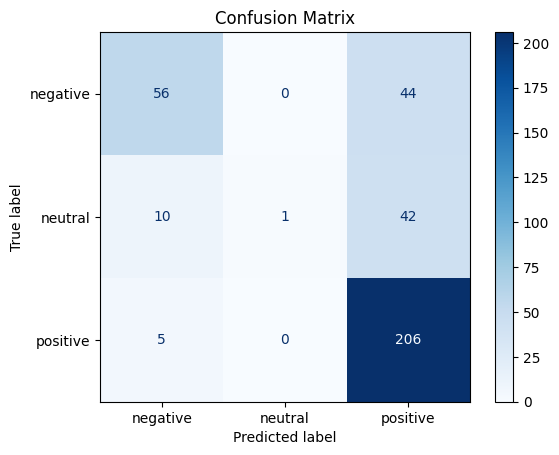

In [ ]:
cm = confusion_matrix(y_test, result)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
matrix = classification_report(y_test, result)
print('Classification report: \n', matrix)

Classification report: 
               precision    recall  f1-score   support

    negative       0.79      0.56      0.65       100
     neutral       1.00      0.02      0.04        53
    positive       0.71      0.98      0.82       211

    accuracy                           0.72       364
   macro avg       0.83      0.52      0.50       364
weighted avg       0.77      0.72      0.66       364



# 6. Testing

In [ ]:
def classify_text(input_text):
  return model_multinomialNaiveBayes.predict([input_text])[0]

model_multinomialNaiveBayes = model.fit(x_train, y_train)

In [ ]:
input_text = input("Enter the text to classify: ")
results = classify_text(input_text)

print("Input word: ", input_text)
print("Classification result: ", results)

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the training data into a single string
text = " ".join(review for review in x_train)

# Create a WordCloud object
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

# Display the generated wordcloud image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generate a bar chart of the most frequent words
words = text.split()
word_counts = Counter(words)
most_common_words = word_counts.most_common(20) # Get the 20 most common words

df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=df_most_common, palette='viridis')
plt.title('20 Kata dengan Frekuensi Terbanyak di Training Data')
plt.xlabel('Jumlah')
plt.ylabel('Kata')
plt.show()